<a href="https://colab.research.google.com/github/bezerraluis/Projeto-AgriDecision/blob/main/Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Próximos passos
- Fazer um repositório com mais imagens

In [1]:
!git clone https://github.com/bezerraluis/Projeto-AgriDecision

Cloning into 'Projeto-AgriDecision'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 2932 (delta 4), reused 11 (delta 2), pack-reused 2913
Receiving objects: 100% (2932/2932), 78.58 MiB | 34.14 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [2]:
# !git clone https://github.com/starly/Soybean_Images_MachineLearning

In [3]:
cd Projeto-AgriDecision/

/content/Projeto-AgriDecision


In [4]:
ls

plant_diseases_classification_using_Resnet.ipynb  Soybean_healthy/
README.md                                         Soybean_rust/
Resnet50.ipynb


In [5]:
#!unzip /content/Soybean_Images_MachineLearning/Soybean_downy_train.zip
#!unzip /content/Soybean_Images_MachineLearning/Soybean_rust_train.zip
#!unzip /content/Soybean_Images_MachineLearning/Soybean_healthy_train.zip

In [6]:
!rm -r /content/Projeto-AgriDecision/.git

In [7]:
# TODO: Import the model and the preprocess_input function
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# TODO: Import the ImageDataGenerator class
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Shape in which all images are going to be reshaped
TARGET_SHAPE = (224, 224, 3)

# TODO: Initialize the data generator class 
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             validation_split=0.2)

# TODO: Create the training and validation generators using the method flow_from_directory
train_gen = datagen.flow_from_directory('/content/Projeto-AgriDecision', 
                                        target_size=TARGET_SHAPE[:2], 
                                        class_mode='categorical',
                                        subset='training')

valid_gen = datagen.flow_from_directory('/content/Projeto-AgriDecision', 
                                        target_size=TARGET_SHAPE[:2], 
                                        class_mode='categorical',
                                        subset='validation')

Found 1985 images belonging to 2 classes.
Found 495 images belonging to 2 classes.


In [8]:
train_gen.class_indices

{'Soybean_healthy': 0, 'Soybean_rust': 1}

In [9]:
sum(train_gen.classes==1)

168

In [10]:
sum(train_gen.classes==0)

1817

In [11]:
train_gen.class_indices

{'Soybean_healthy': 0, 'Soybean_rust': 1}

In [12]:
sum(valid_gen.classes==0)

454

In [13]:
sum(valid_gen.classes==1)

41

In [14]:
# 1. TODO: Import any additional packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50

# 2. TODO: Initialize base model
base_model = ResNet50(include_top=False, input_shape=TARGET_SHAPE)

# 3. TODO: Freeze layers from the base model
for layer in base_model.layers:
    layer.trainable=False
    
# 4. TODO: Add Fully connected layer to the base model
model = Sequential([base_model,
                    GlobalAveragePooling2D(),
                    Dense(1024, activation='relu'),
                    Dense(2, activation='softmax')])

94773248/94765736 [==============================] - 1s 0us/step


In [15]:
import tensorflow as tf
auc_roc = tf.keras.metrics.AUC(name='auc', multi_label=True)

In [16]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy', auc_roc])

In [17]:
model.fit_generator(train_gen, train_gen.n//train_gen.batch_size, epochs=6,
                    validation_data=valid_gen)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/6
62/62 [==============================] - 353s 6s/step - loss: 0.6816 - accuracy: 0.8868 - auc: 0.8233 - val_loss: 0.1553 - val_accuracy: 0.9414 - val_auc: 0.9577
Epoch 2/6
62/62 [==============================] - 338s 5s/step - loss: 0.0525 - accuracy: 0.9798 - auc: 0.9952 - val_loss: 0.1195 - val_accuracy: 0.9556 - val_auc: 0.9820
Epoch 3/6
62/62 [==============================] - 337s 5s/step - loss: 0.0255 - accuracy: 0.9920 - auc: 0.9989 - val_loss: 0.1484 - val_accuracy: 0.9495 - val_auc: 0.9771
Epoch 4/6
62/62 [==============================] - 336s 5s/step - loss: 0.0200 - accuracy: 0.9914 - auc: 0.9834 - val_loss: 0.1273 - val_accuracy: 0.9556 - val_auc: 0.9776
Epoch 5/6
62/62 [==============================] - 334s 5s/step - loss: 0.0661 - accuracy: 0.9834 - auc: 0.9856 - val_loss: 0.1242 - val_accuracy: 0.9515 - val_auc: 0.9808
Epoch 6/6
62/62 [==============================] - 335s 5s/step - loss: 0.0132 - accuracy: 0.9954 - auc: 0.9995 - val_loss: 0.0972 - val_acc

In [18]:
URLS = ['https://i.imgur.com/FlcaZC6.jpg',
        'https://imgur.com/PyxAxlo.jpg',
        'https://imgur.com/Ym4CAAr.jpg',
        'https://imgur.com/OgpJAPe.jpg',
        'https://imgur.com/coB5V2g.jpg',
        'https://imgur.com/cGvY4qA.jpg',
        'https://imgur.com/4Dy0Bmf.jpg',
        'https://imgur.com/qmJmxvK.jpg']

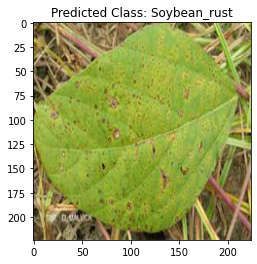

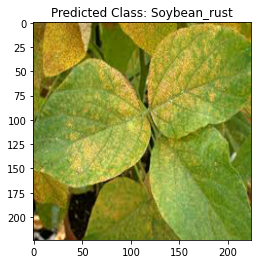

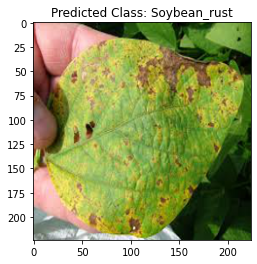

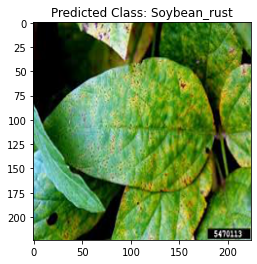

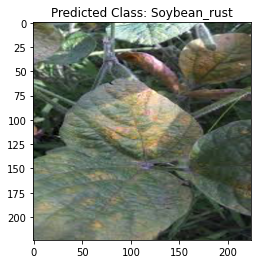

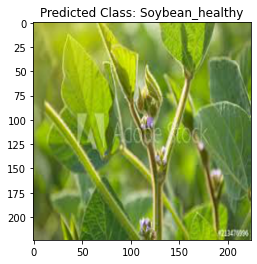

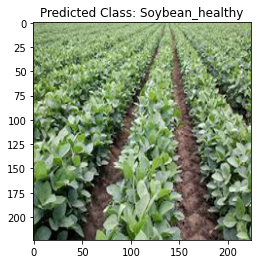

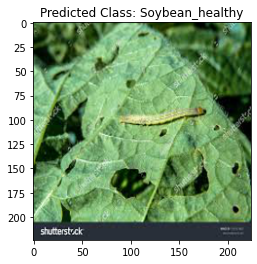

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO
from PIL import Image

def predict_from_url(model, train_gen, url, target_shape=(224,224)):
    
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_shape)

    # Convert to a Numpy array
    img_np = np.asarray(img)

    # Reshape by adding 1 in the beginning to be compatible as input of the model
    img_np = img_np[None] # https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#numpy.newaxis

    # Prepare the image for the model
    img_np = preprocess_input(img_np)

    # Decode output of model into classes and probabilities
    result = model.predict(img_np)
 
    class_indices = train_gen.class_indices    
    index_to_class = {v: k for k, v in class_indices.items()}
    
    # Displaying image
    plt.imshow(img)
    plt.title(f'Predicted Class: {index_to_class[result.argmax()]}')
    plt.show()
    
for url in URLS:
    predict_from_url(model, train_gen, url, target_shape=TARGET_SHAPE[:2])




In [20]:
model.save('model.h5')